In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [26]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/study_hours.csv'
df = pd.read_csv(url)
#df = pd.read_csv(url,nrows=16)
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.0,1.00,0.0,1.00,0.0,1.00,0.0,1.0,1.00,1.0,1.00,1.0,1.0


<Axes: xlabel='Hours', ylabel='Pass'>

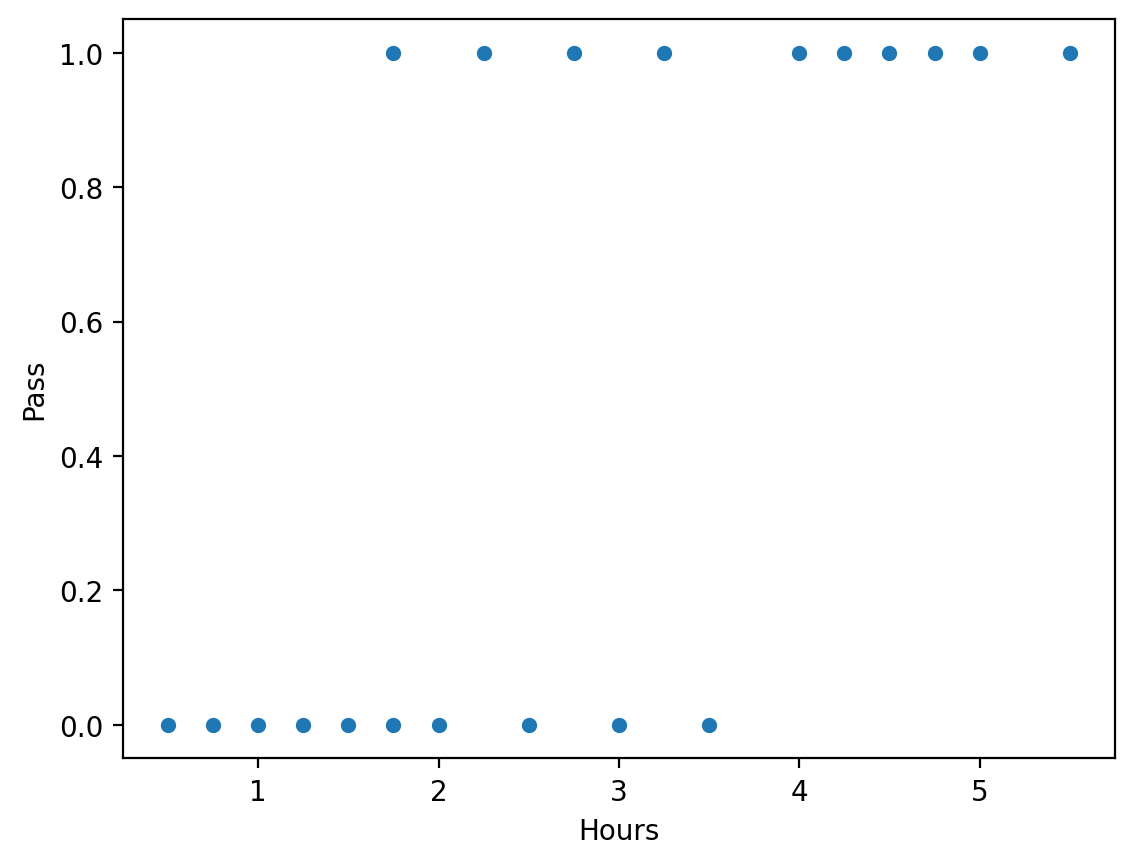

In [27]:
sns.scatterplot(data=df,x="Hours", y="Pass")

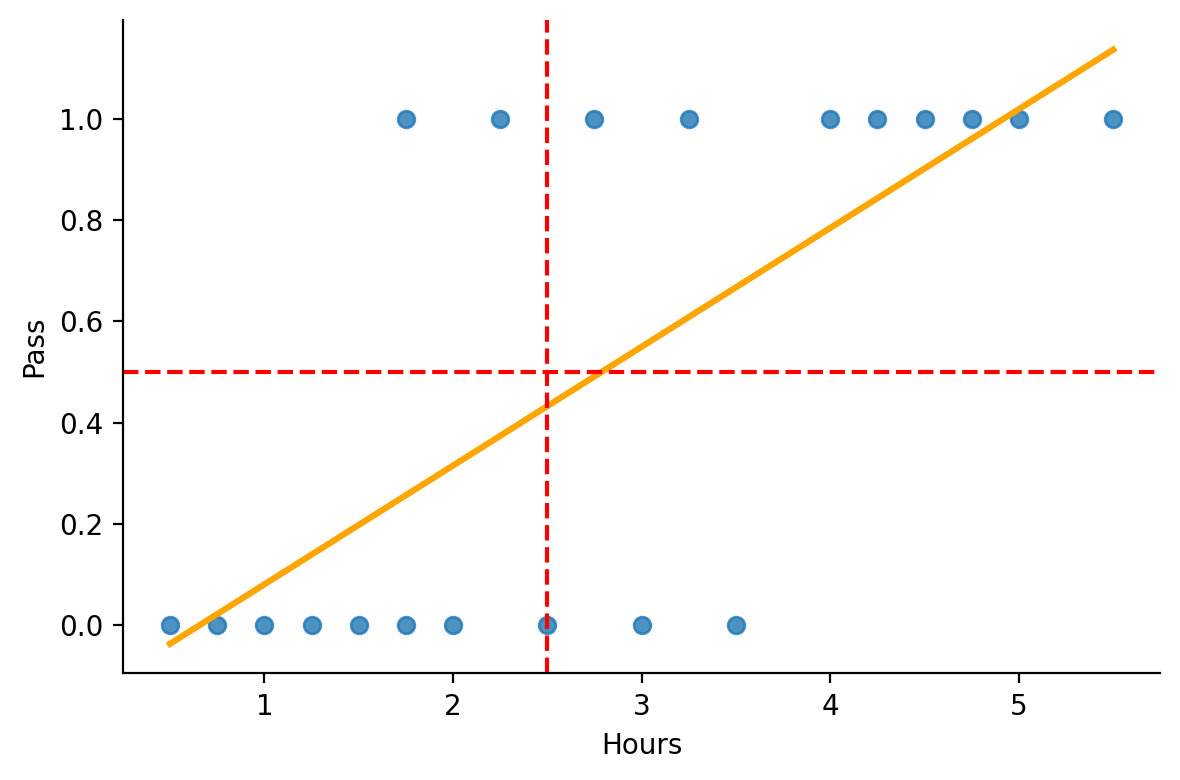

In [28]:
sns.lmplot(x="Hours", y="Pass", data=df,
           logistic=False, ci=None, height=4, aspect=1.5,
           line_kws={'color':'orange'})
plt.axhline(.5, color='red', linestyle='--')
plt.axvline(2.5, color='red', linestyle='--')


In [29]:
df.at[19, 'Hours'] = 100
# df.at[19,'Hours'] = 5.5 # Original data

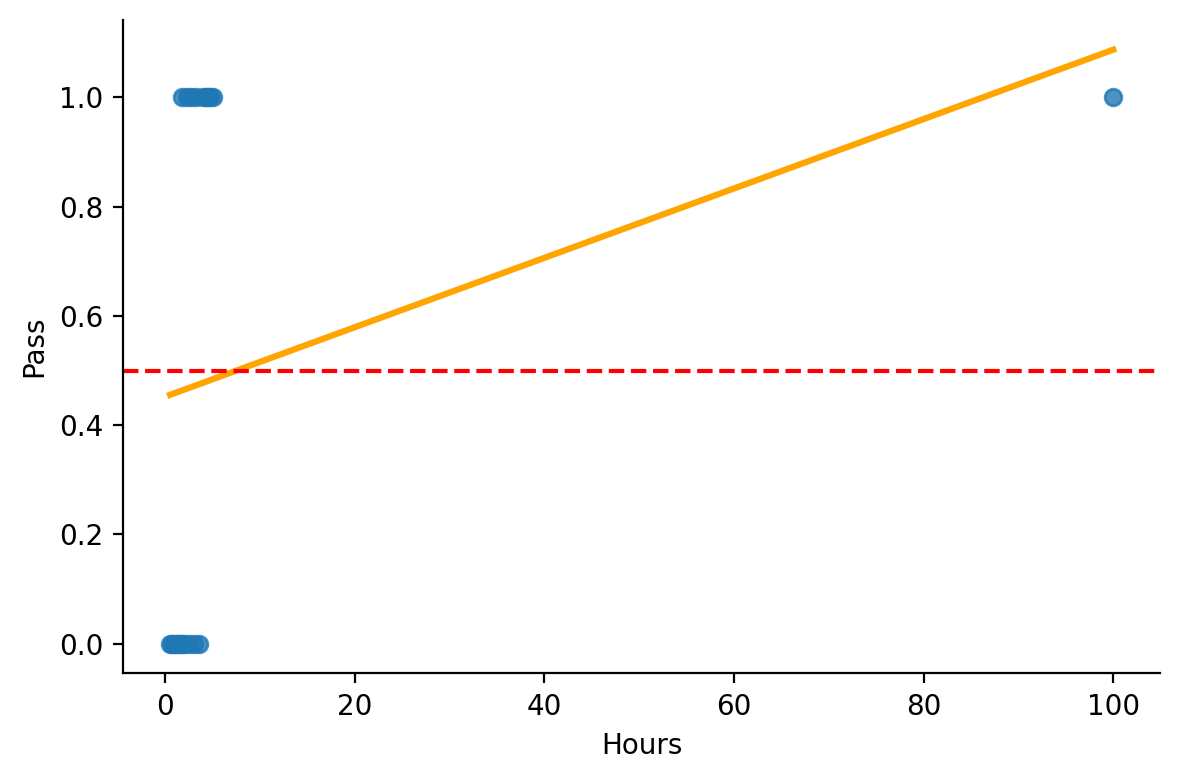

In [30]:
sns.lmplot(x="Hours", y="Pass", data=df,
           logistic=False, ci=None, height=4, aspect=1.5,
           line_kws={'color':'orange'})
plt.axhline(.5, color='red', linestyle='--')


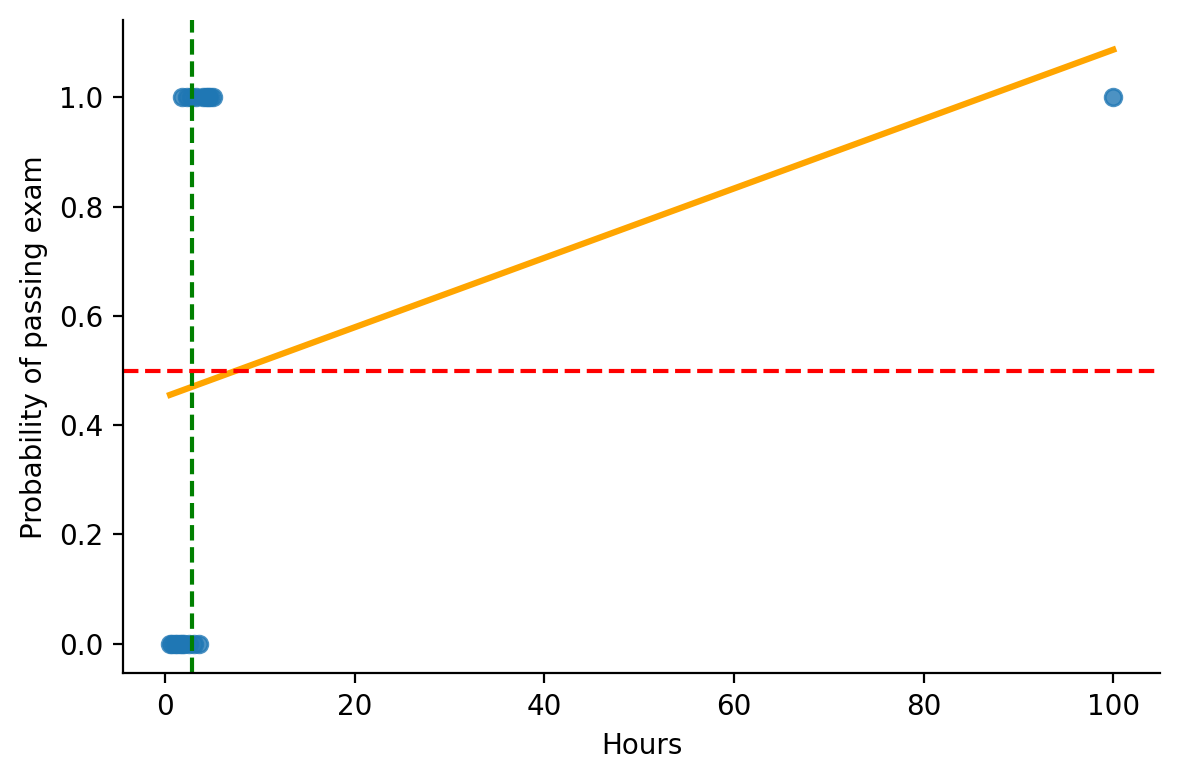

In [33]:
sns.lmplot(x="Hours", y="Pass", data=df,
           logistic=False, ci=None, height=4, aspect=1.5,
           line_kws={'color':'orange'})
plt.ylabel("Probability of passing exam")
plt.axvline(2.8, color='green', linestyle='--')
plt.axhline(0.5, color='red', linestyle='--')


In [34]:
df.at[19, 'Hours'] = 200
# df.at[19,'Hours'] = 5.5 # Original data

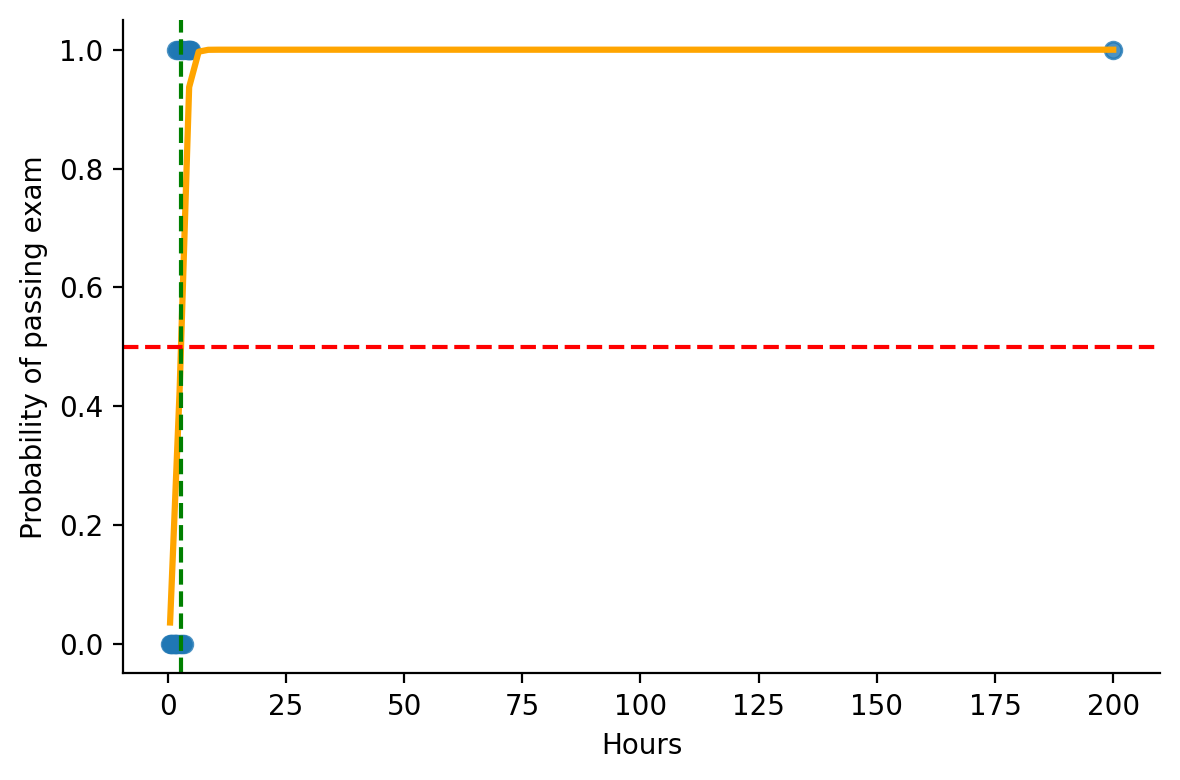

In [35]:
sns.lmplot(x="Hours", y="Pass", data=df,
           logistic=True, ci=None, height=4, aspect=1.5,
           line_kws={'color':'orange'})
plt.ylabel("Probability of passing exam")
plt.axvline(2.74, color='green', linestyle='--')
plt.axhline(0.5, color='red', linestyle='--')

In [36]:
df.at[19, 'Hours'] = 5.5 # original data
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.0,1.00,0.0,1.00,0.0,1.00,0.0,1.0,1.00,1.0,1.00,1.0,1.0


In [37]:
## statsmodel

In [38]:
from patsy import dmatrices
import statsmodels.api as sm

In [39]:
y, X = dmatrices('Pass ~ Hours', data=df, return_type='dataframe') # With intercept cp
# y, X = dmatrices('Pass ~ Hours - 1', data=df, return_type='dataframe') # no intercept cp


In [40]:
X.head()

,Intercept,Hours
0,1.0,0.50
1,1.0,0.75
2,1.0,1.00
3,1.0,1.25
4,1.0,1.50


In [41]:
y.head()

,Pass
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [42]:
## Model_a (with intercept)

In [43]:
model_a = sm.Logit(y,X).fit()
print(model_a.summary())

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Pass   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                  0.4208
Time:                        19:30:23   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006365
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0777      1.761     -2.316      0.021      -7.529      -0.626
Hours          1.5046      0.

In [44]:
model_a.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: Pass             Pseudo R-squared: 0.421     
Date:               2024-12-04 19:30 AIC:              20.0598   
No. Observations:   20               BIC:              22.0512   
Df Model:           1                Log-Likelihood:   -8.0299   
Df Residuals:       18               LL-Null:          -13.863   
Converged:          1.0000           LLR p-value:      0.00063648
No. Iterations:     7.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -4.0777    1.7610  -2.3156  0.0206  -7.5292  -0.6262
Hours          1.5046    0.6287   2.3932  0.0167   0.2724   2.7369
=================================================================

"""

In [ ]:
model_a.predict([[1,2],[1,4]]) # If they use 2 hours for study , Probablility to pass exam is 0.2557

array([0.25570318, 0.8744475 ])

In [ ]:
model_a.predict(X) # if the answer is less than 0.5, our machine is predict they failed exam

0     0.034710
1     0.049773
2     0.070892
3     0.100029
4     0.139344
5     0.190837
6     0.190837
7     0.255703
8     0.333530
9     0.421627
10    0.515011
11    0.607359
12    0.692617
13    0.766481
14    0.874448
15    0.910278
16    0.936624
17    0.955611
18    0.969097
19    0.985194
dtype: float64

In [47]:
model_a.predict(X)

0     0.034710
1     0.049773
2     0.070892
3     0.100029
4     0.139344
5     0.190837
6     0.190837
7     0.255703
8     0.333530
9     0.421627
10    0.515011
11    0.607359
12    0.692617
13    0.766481
14    0.874448
15    0.910278
16    0.936624
17    0.955611
18    0.969097
19    0.985194
dtype: float64

In [48]:
model_a.predict(X).apply(lambda p: 0 if p < .5 else 1)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
dtype: int64

In [49]:
model_a.params

Intercept   -4.077713
Hours        1.504645
dtype: float64

In [50]:
model_a.params

Intercept   -4.077713
Hours        1.504645
dtype: float64

In [51]:
model_a.params['Intercept']

-4.077713431087631

In [52]:
model_a.params[0]

C:\Users\Dell PC\AppData\Local\Temp\ipykernel_13900\1484855097.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model_a.params[0]


-4.077713431087631

In [53]:
model_a.params['Hours']

1.5046454283733335

In [54]:
df

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [55]:
df['predicted']=model_a.predict(X).apply(lambda p: 0 if p < .5 else 1)
df

,Hours,Pass,predicted
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,1.75,1,0
7,2.00,0,0
8,2.25,1,0
9,2.50,0,0


In [ ]:
df['log_odds'] = model_a.params['Intercept']+model_a.params['Hours']*df['Hours'] # logg_odds of passing exam
df['odds'] = np.exp(model_a.params['Intercept']+model_a.params['Hours']*df['Hours'])
df['prob'] = model_a.predict(X)
df

,Hours,Pass,predicted,log_odds,odds,prob
0,0.50,0,0,-3.325391,0.035958,0.034710
1,0.75,0,0,-2.949229,0.052380,0.049773
2,1.00,0,0,-2.573068,0.076301,0.070892
3,1.25,0,0,-2.196907,0.111146,0.100029
4,1.50,0,0,-1.820745,0.161905,0.139344
5,1.75,0,0,-1.444584,0.235844,0.190837
6,1.75,1,0,-1.444584,0.235844,0.190837
7,2.00,0,0,-1.068423,0.343550,0.255703
8,2.25,1,0,-0.692261,0.500443,0.333530
9,2.50,0,0,-0.316100,0.728987,0.421627


In [57]:
## Statsmodels: Confusion Matrix
# Formula: 

In [58]:
model_a.pred_table()

array([[8., 2.],
       [2., 8.]])

In [59]:
tn, fp, fn, tp = model_a.pred_table().ravel()

In [61]:
print(f'tn = {tn}')
print(f'fp = {fp}')
print(f'fn = {fn}')
print(f'tp = {tp}')


tn = 8.0
fp = 2.0
fn = 2.0
tp = 8.0


In [62]:
(tp+tn)/(tp+tn+fp+fn)

0.8

In [63]:
## Visulize

In [65]:
import math
# formula: f(x) = 1/(1+e^(-x))

In [69]:
def sg(intercept, coef, x):
    ex = np.exp(-(intercept + x * coef))
    return (1/(1+ex))

In [70]:
def sp(intercept, coef, x):
    ex = np.exp(-(intercept + x * coef))
    return (1/(1+ex))

C:\Users\Dell PC\AppData\Local\Temp\ipykernel_13900\866479993.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yp = sp(model_a.params[0], model_a.params[1], xp)


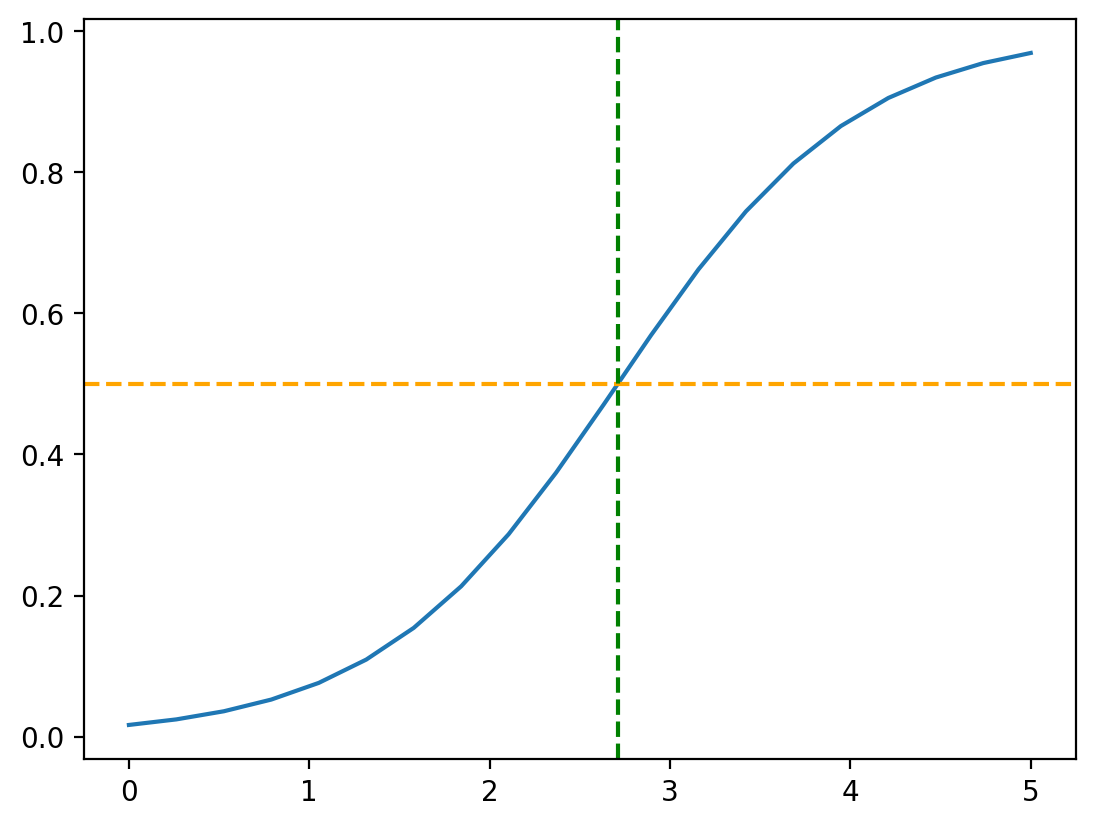

In [71]:
xp = np.linspace(0,5,20)
yp = sp(model_a.params[0], model_a.params[1], xp)
plt.plot(xp,yp)
plt.axhline(.5, color='orange', linestyle='--')
plt.axvline(np.abs(model_a.params['Intercept']/model_a.params['Hours']),
            color='green', linestyle='--')    

In [72]:
# Model_b (no intercept)

In [73]:
y_b, X_b = dmatrices('Pass ~ Hours -1',df, return_type='dataframe') # no intercept

In [74]:
X_b

,Hours
0,0.50
1,0.75
2,1.00
3,1.25
4,1.50
5,1.75
6,1.75
7,2.00
8,2.25
9,2.50


In [75]:
y_b

,Pass
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,1.0
7,0.0
8,1.0
9,0.0


In [77]:
model_b = sm.Logit(y_b, X_b).fit()
model_b.summary()

Optimization terminated successfully.
         Current function value: 0.639808
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   20
Model:                          Logit   Df Residuals:                       19
Method:                           MLE   Df Model:                            0
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                 0.07695
Time:                        20:06:57   Log-Likelihood:                -12.796
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Hours          0.2179      0.157      1.390      0.165      -0.089       0.525
==============================================================================
"""

In [78]:
model_b.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
==============================================================
Model:              Logit            Method:           MLE    
Dependent Variable: Pass             Pseudo R-squared: 0.077  
Date:               2024-12-04 20:07 AIC:              27.5923
No. Observations:   20               BIC:              28.5881
Df Model:           0                Log-Likelihood:   -12.796
Df Residuals:       19               LL-Null:          -13.863
Converged:          1.0000           LLR p-value:      nan    
No. Iterations:     5.0000           Scale:            1.0000 
----------------------------------------------------------------
          Coef.    Std.Err.     z      P>|z|     [0.025   0.975]
----------------------------------------------------------------
Hours     0.2179     0.1568   1.3900   0.1645   -0.0894   0.5253
==============================================================

"""

In [79]:
model_b.pred_table()

array([[ 0., 10.],
       [ 0., 10.]])